In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
SAMPLE = False

In [20]:
df = None
for root, dirs, files in os.walk('results'):
    for file in files:
        if file.endswith('.csv'):
            print(f'Processing {file}')
            if df is None:
                df = pd.read_csv(f'results/{file}')
            else:
                df = pd.concat([df, pd.read_csv(f'results/{file}')])

df          

Processing gsm8k_llama3-8B-Instruct.csv
Processing gsm8k_Meta-Llama-3.1-8B-Instruct.csv
Processing gsm8k_Qwen1.5-1.8B-Chat-AWQ.csv
Processing gsm8k_Qwen1.5-1.8B-Chat.csv
Processing gsm8k_Qwen1.5-14B-Chat-AWQ.csv
Processing gsm8k_Qwen1.5-14B-Chat.csv
Processing gsm8k_Qwen1.5-32B-Chat-AWQ.csv
Processing gsm8k_Qwen1.5-32B-Chat.csv
Processing gsm8k_Qwen1.5-4B-Chat-AWQ.csv
Processing gsm8k_Qwen1.5-4B-Chat.csv
Processing gsm8k_Qwen1.5-7B-Chat-AWQ.csv
Processing gsm8k_Qwen1.5-7B-Chat.csv


,question,qid,ground_truth,ground_truth_answer,model_output,model_output_answer,method,accuracy,bit_per_token,total_length,model_name
0,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,ses 3 + 4 = 7 eggs. This means she has 16 - 7 ...,18,baseline,1,16.000000,696,meta-llama/Meta-Llama-3-8B-Instruct
1,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,6 dollars. #### 26,26,KiVi_2_128,0,4.782609,644,meta-llama/Meta-Llama-3-8B-Instruct
2,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,6 dollars. #### 26,26,KiVi_2_192,0,6.173913,644,meta-llama/Meta-Llama-3-8B-Instruct
3,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,6 dollars. #### 26,26,KiVi_2_256,0,7.565217,644,meta-llama/Meta-Llama-3-8B-Instruct
4,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,"er day, so she has 16 - 7 = 9 eggs left. She s...",18,StreamingQuant_2_128,1,4.597101,690,meta-llama/Meta-Llama-3-8B-Instruct
...,...,...,...,...,...,...,...,...,...,...,...
21099,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,) who want to divide 7 pizzas evenly. Each piz...,14,PartialStreamingQuant_2_192,1,5.647619,735,Qwen/Qwen1.5-7B-Chat
21100,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,) who ordered 7 pizzas. Each pizza has 8 slice...,14,PartialStreamingQuant_2_256,1,6.929849,727,Qwen/Qwen1.5-7B-Chat
21101,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,) who want to divide 7 pizzas evenly. Each piz...,14,PartialLogQuant_2_128,1,4.424899,739,Qwen/Qwen1.5-7B-Chat
21102,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,) who ordered 7 pizzas. Each pizza has 8 slice...,14,PartialLogQuant_2_192,1,5.579228,751,Qwen/Qwen1.5-7B-Chat


In [21]:
df['model'] = df['model_name'].apply(lambda x: x.split('/')[-1])
df

,question,qid,ground_truth,ground_truth_answer,model_output,model_output_answer,method,accuracy,bit_per_token,total_length,model_name,model
0,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,ses 3 + 4 = 7 eggs. This means she has 16 - 7 ...,18,baseline,1,16.000000,696,meta-llama/Meta-Llama-3-8B-Instruct,Meta-Llama-3-8B-Instruct
1,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,6 dollars. #### 26,26,KiVi_2_128,0,4.782609,644,meta-llama/Meta-Llama-3-8B-Instruct,Meta-Llama-3-8B-Instruct
2,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,6 dollars. #### 26,26,KiVi_2_192,0,6.173913,644,meta-llama/Meta-Llama-3-8B-Instruct,Meta-Llama-3-8B-Instruct
3,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,6 dollars. #### 26,26,KiVi_2_256,0,7.565217,644,meta-llama/Meta-Llama-3-8B-Instruct,Meta-Llama-3-8B-Instruct
4,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,"er day, so she has 16 - 7 = 9 eggs left. She s...",18,StreamingQuant_2_128,1,4.597101,690,meta-llama/Meta-Llama-3-8B-Instruct,Meta-Llama-3-8B-Instruct
...,...,...,...,...,...,...,...,...,...,...,...,...
21099,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,) who want to divide 7 pizzas evenly. Each piz...,14,PartialStreamingQuant_2_192,1,5.647619,735,Qwen/Qwen1.5-7B-Chat,Qwen1.5-7B-Chat
21100,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,) who ordered 7 pizzas. Each pizza has 8 slice...,14,PartialStreamingQuant_2_256,1,6.929849,727,Qwen/Qwen1.5-7B-Chat,Qwen1.5-7B-Chat
21101,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,) who want to divide 7 pizzas evenly. Each piz...,14,PartialLogQuant_2_128,1,4.424899,739,Qwen/Qwen1.5-7B-Chat,Qwen1.5-7B-Chat
21102,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,) who ordered 7 pizzas. Each pizza has 8 slice...,14,PartialLogQuant_2_192,1,5.579228,751,Qwen/Qwen1.5-7B-Chat,Qwen1.5-7B-Chat


In [22]:
df_sum = df[['model', 'method', 'accuracy', 'bit_per_token']].groupby(['model', 'method']).sum().reset_index()
df_sum = df_sum.sort_values(by='accuracy', ascending=False)
df_sum

,model,method,accuracy,bit_per_token
111,Qwen1.5-32B-Chat,baseline,1061,21104.000000
101,Qwen1.5-32B-Chat,LogQuant_2_256,1046,8467.575857
107,Qwen1.5-32B-Chat,PartialStreamingQuant_2_256,1037,8521.369834
126,Qwen1.5-32B-Chat-AWQ,StreamingQuant_2_256,1037,8528.146387
127,Qwen1.5-32B-Chat-AWQ,baseline,1032,21104.000000
...,...,...,...,...
32,Qwen1.5-1.8B-Chat,KiVi_2_128,74,5756.919563
51,Qwen1.5-1.8B-Chat-AWQ,LogQuant_2_128,67,5550.678214
49,Qwen1.5-1.8B-Chat-AWQ,KiVi_2_192,23,7116.242312
48,Qwen1.5-1.8B-Chat-AWQ,KiVi_2_128,23,5591.862851


In [23]:
df_avg = df_acc_sum = df[['model', 'method', 'accuracy', 'bit_per_token']].groupby(['model', 'method']).mean().reset_index()
df_avg = df_avg.sort_values(by='bit_per_token', ascending=True)
df_avg


,model,method,accuracy,bit_per_token
67,Qwen1.5-14B-Chat,LogQuant_2_128,0.620167,4.082135
83,Qwen1.5-14B-Chat-AWQ,LogQuant_2_128,0.633055,4.105056
73,Qwen1.5-14B-Chat,PartialStreamingQuant_2_128,0.648976,4.113404
64,Qwen1.5-14B-Chat,KiVi_2_128,0.594390,4.119643
76,Qwen1.5-14B-Chat,StreamingQuant_2_128,0.639121,4.122007
...,...,...,...,...
31,Meta-Llama-3.1-8B-Instruct,baseline,0.714177,16.000000
111,Qwen1.5-32B-Chat,baseline,0.804397,16.000000
95,Qwen1.5-14B-Chat-AWQ,baseline,0.702805,16.000000
15,Meta-Llama-3-8B-Instruct,baseline,0.760425,16.000000


In [24]:
df_avg['compression ratio'] = 16 / df_avg['bit_per_token']
df_avg

,model,method,accuracy,bit_per_token,compression ratio
67,Qwen1.5-14B-Chat,LogQuant_2_128,0.620167,4.082135,3.919518
83,Qwen1.5-14B-Chat-AWQ,LogQuant_2_128,0.633055,4.105056,3.897633
73,Qwen1.5-14B-Chat,PartialStreamingQuant_2_128,0.648976,4.113404,3.889722
64,Qwen1.5-14B-Chat,KiVi_2_128,0.594390,4.119643,3.883832
76,Qwen1.5-14B-Chat,StreamingQuant_2_128,0.639121,4.122007,3.881605
...,...,...,...,...,...
31,Meta-Llama-3.1-8B-Instruct,baseline,0.714177,16.000000,1.000000
111,Qwen1.5-32B-Chat,baseline,0.804397,16.000000,1.000000
95,Qwen1.5-14B-Chat-AWQ,baseline,0.702805,16.000000,1.000000
15,Meta-Llama-3-8B-Instruct,baseline,0.760425,16.000000,1.000000


In [25]:
df_avg['model'].unique()

array(['Qwen1.5-14B-Chat', 'Qwen1.5-14B-Chat-AWQ', 'Qwen1.5-7B-Chat',
       'Qwen1.5-32B-Chat', 'Qwen1.5-32B-Chat-AWQ', 'Qwen1.5-7B-Chat-AWQ',
       'Qwen1.5-1.8B-Chat-AWQ', 'Meta-Llama-3.1-8B-Instruct',
       'Qwen1.5-1.8B-Chat', 'Qwen1.5-4B-Chat', 'Qwen1.5-4B-Chat-AWQ',
       'Meta-Llama-3-8B-Instruct'], dtype=object)

/tmp/ipykernel_57660/2040669846.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_57660/2040669846.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_57660/2040669846.py:22: SettingWithCopyWarning: 
A value is trying to be set 

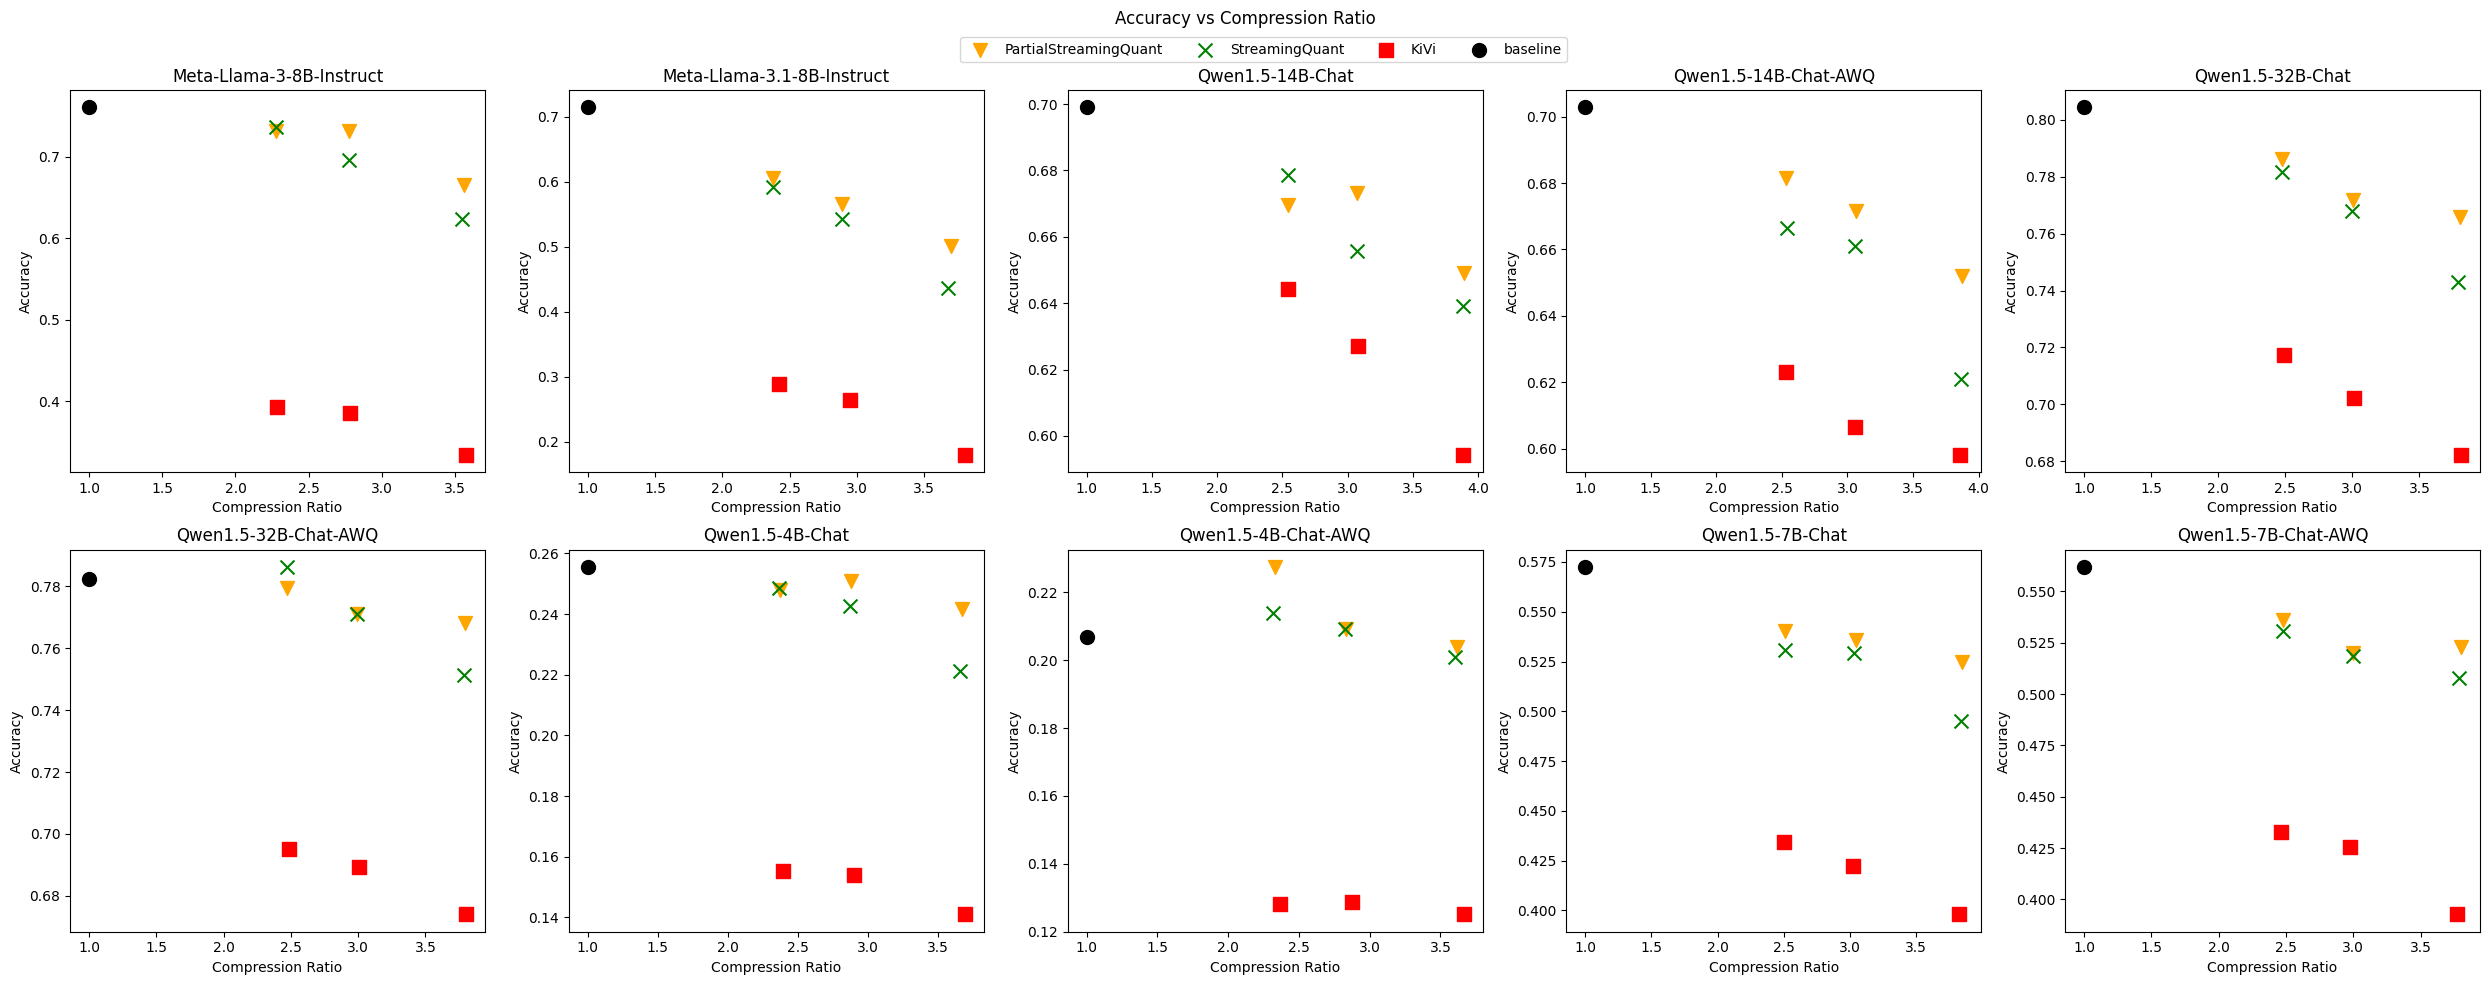

In [35]:
import numpy as np
import random

# Define a dictionary to map styles to subplots
style_mapping = {
    'baseline': {'color': 'black', 'marker': 'o'},
    'KiVi': {'color': 'red', 'marker': 's'},
    'StreamingQuant': {'color': 'green', 'marker': 'x'},
    'PartialStreamingQuant': {'color': 'orange', 'marker': 'v'},
    'LogQuant': {'color': 'blue', 'marker': 'D'},
    'PartialLogQuant': {'color': 'purple', 'marker': 'P'},
}

fig, axs = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('Accuracy vs Compression Ratio')

models = df_avg['model'].unique()
models.sort()
models = [model for model in models if '1.8B' not in model]
for i, model in enumerate(models):
    df_model = df_avg[df_avg['model'] == model]
    df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
    ax = axs[i // 5, i % 5]
    
    np.random.seed(0)
    random.seed(0)
    
    for method in df_model['method'].unique():
        if "Log" in method:
            continue
        method_data = df_model[df_model['method'] == method]
        style = style_mapping.get(method, {})
        
        ax.scatter(method_data['compression ratio'], method_data['accuracy'], 
                   color=style.get('color', 'black'), 
                   marker=style.get('marker', 'o'), 
                   s=100, 
                   label=method)
    
    ax.set_title(model)
    ax.set_xlabel('Compression Ratio')
    ax.set_ylabel('Accuracy')
    #ax.set_ylim(0, 0.8)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.legend(loc='upper left', ncol=6, bbox_to_anchor=(-2.68, 2.36))
plt.savefig("results/accuracy_vs_compression_ratio_Streaming.png", dpi=600)
plt.show()

/tmp/ipykernel_57660/2677630220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_57660/2677630220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_57660/2677630220.py:22: SettingWithCopyWarning: 
A value is trying to be set 

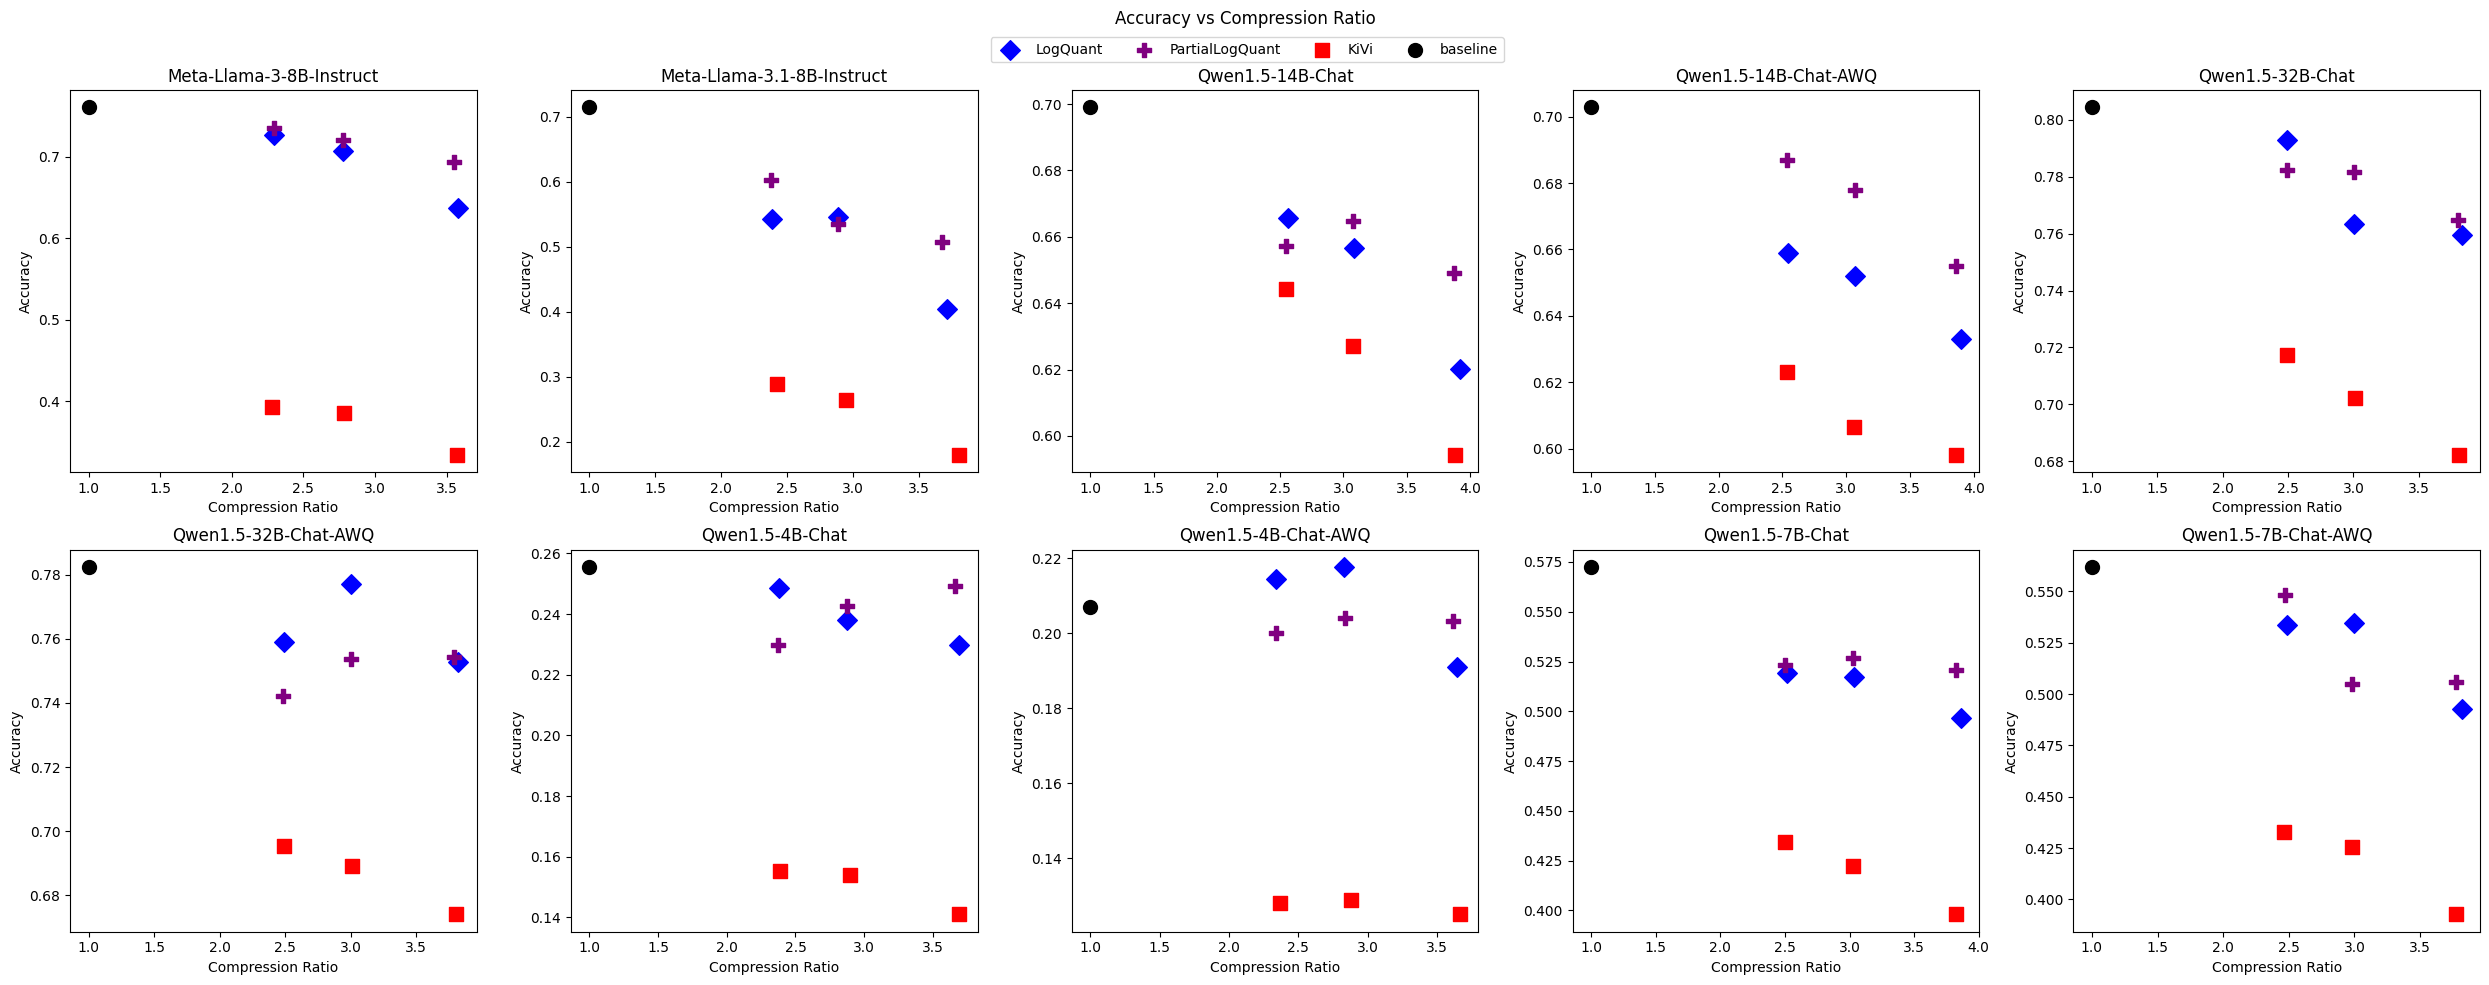

In [36]:
import numpy as np
import random

# Define a dictionary to map styles to subplots
style_mapping = {
    'baseline': {'color': 'black', 'marker': 'o'},
    'KiVi': {'color': 'red', 'marker': 's'},
    'StreamingQuant': {'color': 'green', 'marker': 'x'},
    'PartialStreamingQuant': {'color': 'orange', 'marker': 'v'},
    'LogQuant': {'color': 'blue', 'marker': 'D'},
    'PartialLogQuant': {'color': 'purple', 'marker': 'P'},
}

fig, axs = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('Accuracy vs Compression Ratio')

models = df_avg['model'].unique()
models.sort()
models = [model for model in models if '1.8B' not in model]
for i, model in enumerate(models):
    df_model = df_avg[df_avg['model'] == model]
    df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
    ax = axs[i // 5, i % 5]
    
    np.random.seed(0)
    random.seed(0)
    
    for method in df_model['method'].unique():
        if "Stream" in method:
            continue
        method_data = df_model[df_model['method'] == method]
        style = style_mapping.get(method, {})
        
        ax.scatter(method_data['compression ratio'], method_data['accuracy'], 
                   color=style.get('color', 'black'), 
                   marker=style.get('marker', 'o'), 
                   s=100, 
                   label=method)
    
    ax.set_title(model)
    ax.set_xlabel('Compression Ratio')
    ax.set_ylabel('Accuracy')
    #ax.set_ylim(0, 0.8)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.legend(loc='upper left', ncol=6, bbox_to_anchor=(-2.68, 2.36))
plt.savefig("results/accuracy_vs_compression_ratio_Log.png", dpi=600)
plt.show()

/tmp/ipykernel_57660/3208914805.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_57660/3208914805.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_57660/3208914805.py:22: SettingWithCopyWarning: 
A value is trying to be set 

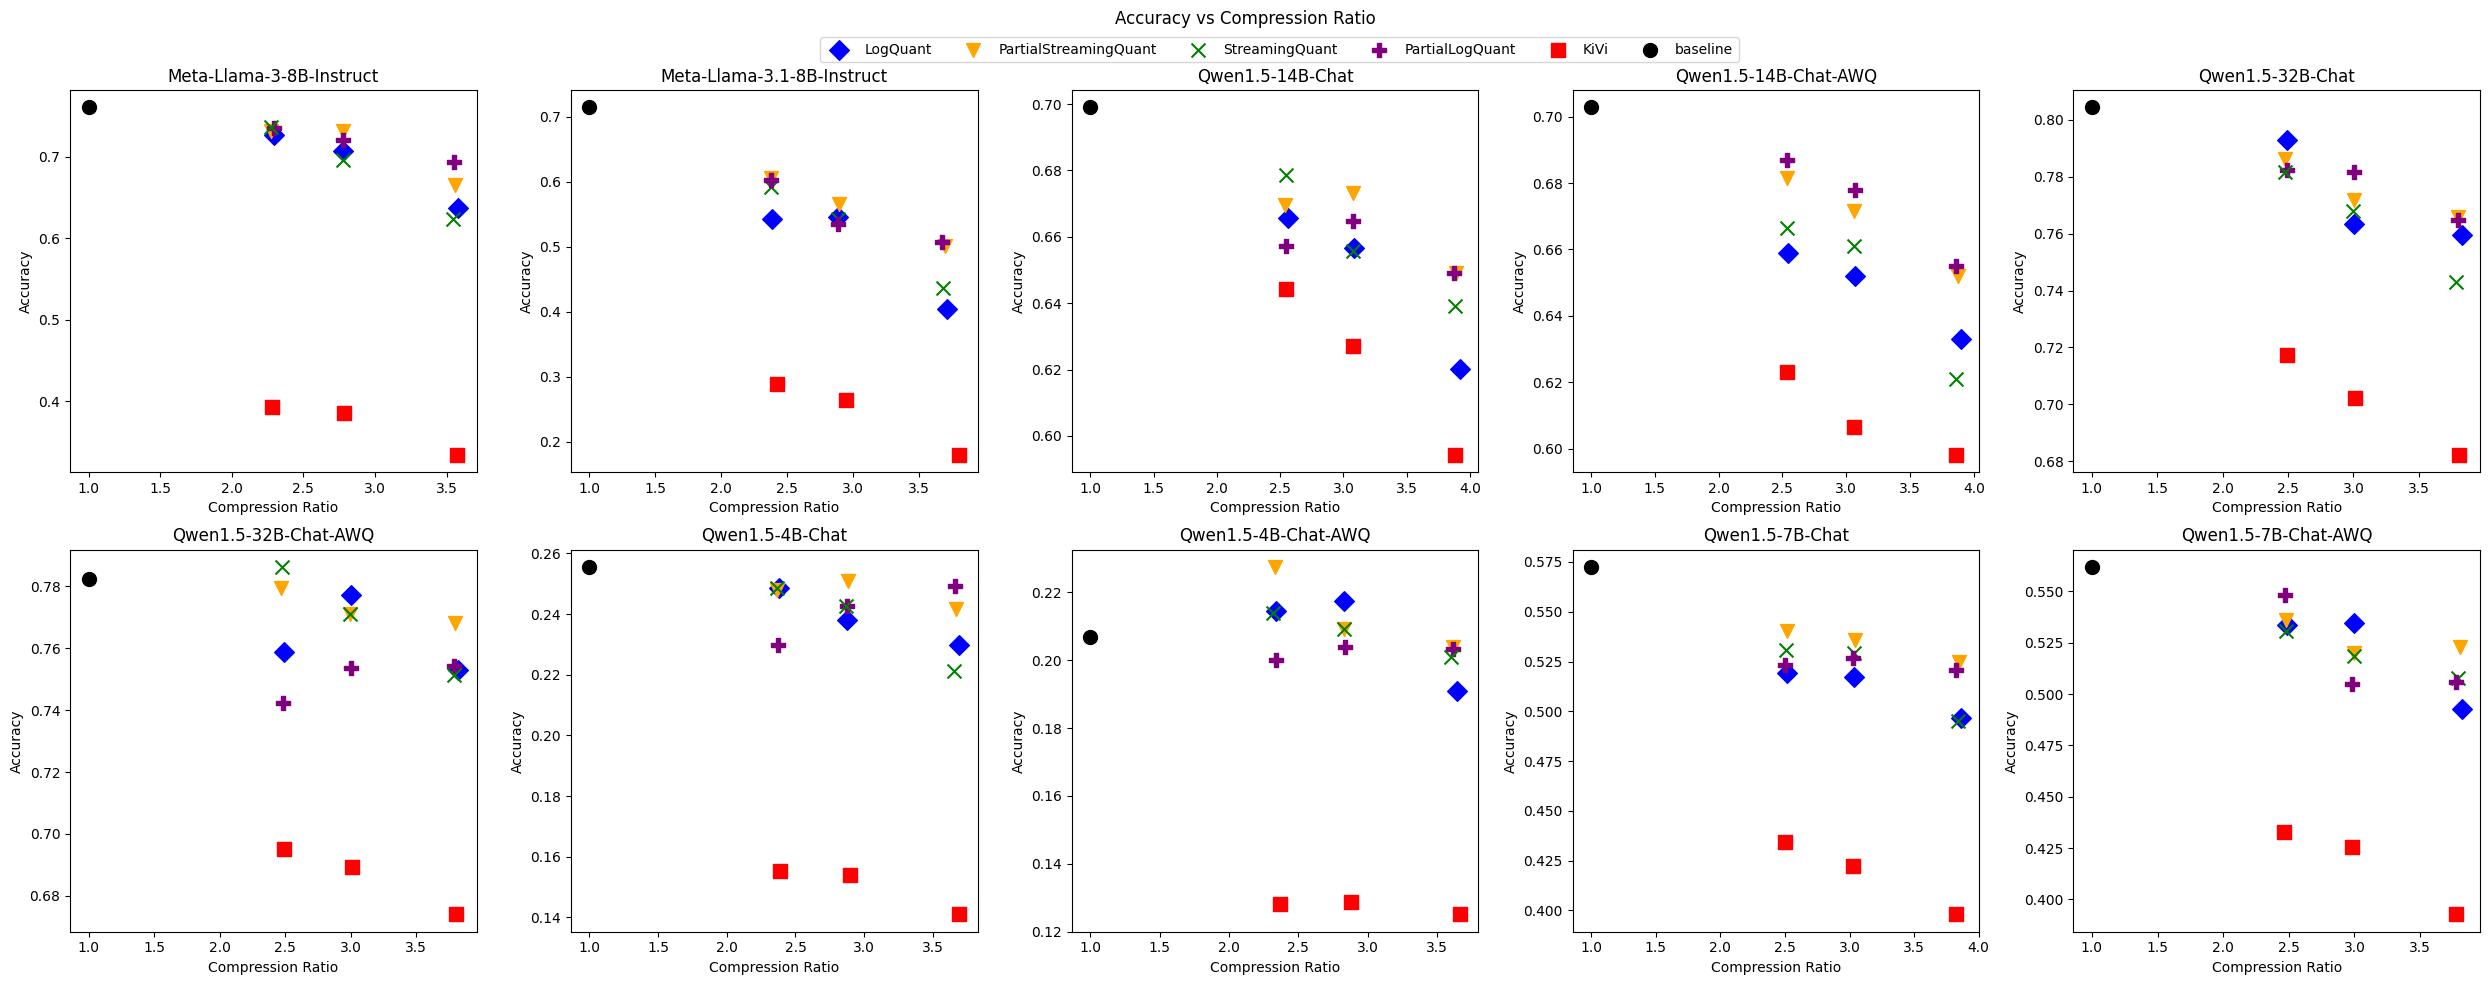

In [41]:
import numpy as np
import random

# Define a dictionary to map styles to subplots
style_mapping = {
    'baseline': {'color': 'black', 'marker': 'o'},
    'KiVi': {'color': 'red', 'marker': 's'},
    'StreamingQuant': {'color': 'green', 'marker': 'x'},
    'PartialStreamingQuant': {'color': 'orange', 'marker': 'v'},
    'LogQuant': {'color': 'blue', 'marker': 'D'},
    'PartialLogQuant': {'color': 'purple', 'marker': 'P'},
}

fig, axs = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('Accuracy vs Compression Ratio')

models = df_avg['model'].unique()
models.sort()
models = [model for model in models if '1.8B' not in model]
for i, model in enumerate(models):
    df_model = df_avg[df_avg['model'] == model]
    df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
    ax = axs[i // 5, i % 5]
    
    np.random.seed(0)
    random.seed(0)
    
    for method in df_model['method'].unique():
        method_data = df_model[df_model['method'] == method]
        style = style_mapping.get(method, {})
        
        ax.scatter(method_data['compression ratio'], method_data['accuracy'], 
                   color=style.get('color', 'black'), 
                   marker=style.get('marker', 'o'), 
                   s=100, 
                   label=method)
    
    ax.set_title(model)
    ax.set_xlabel('Compression Ratio')
    ax.set_ylabel('Accuracy')
    #ax.set_ylim(0, 0.8)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.legend(loc='upper left', ncol=6, bbox_to_anchor=(-3.1, 2.36))
plt.savefig("results/accuracy_vs_compression_ratio.png", dpi=600)
plt.show()